In [1]:
#Imports
import numpy as np
import pandas as pd
import sklearn as scikit
import seaborn as sns
from matplotlib import pyplot as plt
import re
from math import isnan
from datetime import datetime
from math import isnan
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# Part 1: Reading in data and selecting features

In [2]:
#Read in master csv
master = pd.read_csv("new_weather_master.csv")

#Converting features to separate dataframe
main_features = master[['dt_iso','city_name', 'temp', 'humidity', 'wind_speed', 'rain_3h', 'clouds_all']]
main_features.rename(columns={'dt_iso': 'datetime', 'city_name': 'city', 'wind_speed': 'windspeed', 'clouds_all': 'cloudiness', 'rain_3h': 'rain3h'}, inplace=True)


#Cleaning up date and time entries
dateSplit = lambda entry: entry.split(" ")[0]
main_features['date'] = main_features.datetime.apply(dateSplit)
def timeSplit(entry):
    s1 = entry.split(" ")[0]
    s1 = s1.split("-")
    s1 = reversed(s1)
    s1 = '/'.join(s1)
    s2 = entry.split(" ")[1]
    s3 = s1 + " " + s2
    return datetime.strptime(s3, "%d/%m/%Y %H:%M:%S")
main_features['time'] = main_features.datetime.apply(timeSplit)
#Changing date to a datetime object for easier selection
convertDateTime = lambda date: np.array(date, dtype=np.datetime64)
main_features['date'] = main_features.date.apply(convertDateTime)
main_features['rain3h'].fillna(value=0, inplace=True)
main_features.drop(columns=['datetime'], inplace=True)
print(main_features.columns)

C:\Users\docto\miniconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Index(['city', 'temp', 'humidity', 'windspeed', 'rain3h', 'cloudiness', 'date',
       'time'],
      dtype='object')


C:\Users\docto\miniconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Part 2: Selecting rows for historical fires and storing them in new datasets

In [ ]:
print(main_features['rain3h'].count())
main_features.to_csv('main_features')

In [3]:
"""Part 2: Selecting rows for historical fires and storing them in new dataframes"""
len_firedata = 0
#Loma Fire of 2009
#Start: October 25, 2009
#Contained: October 27, 2009
#Size: 485 Acres
#Location: Loma Chiquita
#Fire Over 1000 Label: 0
LomaFire2009 = main_features.copy()
startDate = np.array('2009-10-25', dtype=np.datetime64)
lstartDate = startDate + np.arange(3)
LomaFire2009 = LomaFire2009[(LomaFire2009.city == 'Loma Chiquita') & (LomaFire2009.date.isin(lstartDate))]
LomaFire2009['1000Acres'] = 0
LomaFire2009['ID'] = "Loma2009"
LomaFire2009['droughtIndex'] = 295
LomaFire2009['rain3h'].fillna(value=0, inplace=True)
len_firedata += len(LomaFire2009)
display(LomaFire2009)
print(LomaFire2009[['temp', 'windspeed', 'humidity', 'rain3h', 'cloudiness']].isnull().sum())
#Whitehurst Fire of 2008
#Start: June 21, 2008
#Contained: June 23, 2008
#Size: 200 Acres
#Location: Hecker Pass
#Fire Over 1000 Label: 0
WhitehurstFire2008 = main_features.copy()
startDate = np.array('2008-06-21', dtype=np.datetime64)
wstartDate = startDate + np.arange(3)
WhitehurstFire2008 = WhitehurstFire2008[(WhitehurstFire2008.city == 'Hecker Pass') & (WhitehurstFire2008.date.isin(wstartDate))]
WhitehurstFire2008['1000Acres'] = 0
WhitehurstFire2008['ID'] = "Whitehurst2008"
WhitehurstFire2008['rain3h'].fillna(value=0, inplace=True)
WhitehurstFire2008['droughtIndex'] = 200
len_firedata += len(WhitehurstFire2008)
#Summit Fire of 2008
#Start: May 22, 2008
#Contained: May 27, 2008
#Size: 4270 Acres
#Location: Sveadal
#Fire Over 1000 Label: 1
SummitFire2008 = main_features.copy()
startDate = np.array('2008-05-22', dtype=np.datetime64)
sstartDate = startDate + np.arange(6)
SummitFire2008 = SummitFire2008[(SummitFire2008.city == 'Sveadal') & (SummitFire2008.date.isin(sstartDate))]
SummitFire2008['1000Acres'] = 1
SummitFire2008['ID'] = "Summit2008"
SummitFire2008['rain3h'].fillna(value=0, inplace=True)
SummitFire2008['droughtIndex'] = 100
len_firedata += len(SummitFire2008)
#Loma Fire of 2016
#Start: September 26, 2016
#Contained: October 12, 2016
#Size: 4474 Acres
#Location: Loma Chiquita
#Fire Over 1000 Label: 1
LomaFire2016 = main_features.copy()
startDate = np.array('2016-09-26', dtype=np.datetime64)
l2startDate = startDate + np.arange(17)
LomaFire2016 = LomaFire2016[(LomaFire2016.city == 'Loma Chiquita') & (LomaFire2016.date.isin(l2startDate))]
LomaFire2016['1000Acres'] = 1
LomaFire2016['ID'] = "Loma2016"
LomaFire2016['rain3h'].fillna(value=0, inplace=True)
LomaFire2016['droughtIndex'] = 295
len_firedata += len(LomaFire2016)
#Croy Fire of 2002
#Start: September 23, 2002
#End: September 29, 2002
#Size: 3127 Acres
#Location: Sveadal
#Fire Over 1000 Label: 1
CroyFire2002 = main_features.copy()
startDate = np.array('2002-09-23', dtype=np.datetime64)
cstartDate = startDate + np.arange(7)
CroyFire2002 = CroyFire2002[(CroyFire2002.city == 'Loma Chiquita') & (CroyFire2002.date.isin(cstartDate))]
CroyFire2002['1000Acres'] = 1
CroyFire2002['ID'] = "Croy2002"
CroyFire2002['rain3h'].fillna(value=0, inplace=True)
CroyFire2002['droughtIndex'] = 100
len_firedata += len(CroyFire2002)

,city,temp,humidity,windspeed,rain3h,cloudiness,date,time,1000Acres,ID,droughtIndex
230193,Loma Chiquita,63.54,83,5.82,0.0,1,2009-10-25,2009-10-25 00:00:00,0,Loma2009,295
230194,Loma Chiquita,61.45,86,4.70,0.0,1,2009-10-25,2009-10-25 01:00:00,0,Loma2009,295
230195,Loma Chiquita,58.73,96,5.82,0.0,90,2009-10-25,2009-10-25 02:00:00,0,Loma2009,295
230196,Loma Chiquita,57.52,93,5.12,0.0,90,2009-10-25,2009-10-25 03:00:00,0,Loma2009,295
230197,Loma Chiquita,57.11,100,3.36,0.0,90,2009-10-25,2009-10-25 04:00:00,0,Loma2009,295
...,...,...,...,...,...,...,...,...,...,...,...
230260,Loma Chiquita,61.61,26,12.75,0.0,1,2009-10-27,2009-10-27 19:00:00,0,Loma2009,295
230261,Loma Chiquita,62.65,27,9.17,0.0,1,2009-10-27,2009-10-27 20:00:00,0,Loma2009,295
230262,Loma Chiquita,63.82,24,10.29,0.0,1,2009-10-27,2009-10-27 21:00:00,0,Loma2009,295
230263,Loma Chiquita,63.50,23,13.87,0.0,1,2009-10-27,2009-10-27 22:00:00,0,Loma2009,295


temp          0
windspeed     0
humidity      0
rain3h        0
cloudiness    0
dtype: int64


# Part 3: Exploratory Data Analysis

### Feature 1: Temperature

In [4]:
wildfires = pd.concat([LomaFire2009, WhitehurstFire2008, SummitFire2008, LomaFire2016, CroyFire2002])
wildfires.temp = wildfires['temp'].astype(int)
tempMean = wildfires.groupby("ID").temp.apply(np.mean)
tempMedian = wildfires.groupby("ID").temp.apply(np.median)

In [ ]:

tempMax = wildfires.groupby("ID").temp.apply(np.max)
tempMin = wildfires.groupby("ID").temp.apply(np.min)
"""
temp25 = wildfires.groupby("ID").temp.apply(np.percentile(wildfires.temp, 25))
temp75 = wildfires.groupby("ID").temp.apply(np.percentile(wildfires.temp, 75))
tempStd = wildfires.groupby("ID").temp.apply(np.std)
"""

"""
print("Mean", tempMean, "\n")
print("Median", tempMedian, "\n")
print("Max", tempMax, "\n")
print("Min", tempMin, "\n")
#print("25", temp25)
#print("75", temp75)
print("Std", tempStd, "\n")
"""


In [ ]:
print(wildfires.temp.dtype)

#wildfires.quantile(0.25, numeric_only=False)
#temp25 = wildfires.groupby("ID").temp.apply(np.quantile(wildfires.temp, .25))
#temp75 = wildfires.groupby("ID").temp.apply(np.percentile(wildfires.temp, 75))
#tempStd = wildfires.groupby("ID").temp.apply(np.std)

### Feature 2: Humidity

In [ ]:
humidityMean = wildfires.groupby("ID").humidity.apply(np.mean)
humidityMedian = wildfires.groupby("ID").humidity.apply(np.median)
humidityMax = wildfires.groupby("ID").humidity.apply(np.max)
humidityMin = wildfires.groupby("ID").humidity.apply(np.min)
#humidity25 = wildfires.groupby("ID").humidity.apply(np.percentile(wildfires.humidity, 25))
#humidity75 = wildfires.groupby("ID").humidity.apply(np.percentile(wildfires.humidity, 75))
humidityStd = wildfires.groupby("ID").humidity.apply(np.std)

print("Mean", humidityMean, "\n")
print("Median", humidityMedian, "\n")
print("Max", humidityMax, "\n")
print("Min", humidityMin, "\n")
#print("25", humidity25)
#print("75", humidity75)
print("Std", humidityStd, "\n")


### Feature 3: Wind Speed

In [ ]:
windSpeedMean = wildfires.groupby("ID").windspeed.apply(np.mean)
windSpeedMedian = wildfires.groupby("ID").windspeed.apply(np.median)
windSpeedMax = wildfires.groupby("ID").windspeed.apply(np.max)
windSpeedMin = wildfires.groupby("ID").windspeed.apply(np.min)
#windSpeed25 = wildfires.groupby("ID").windspeed.apply(np.percentile(wildfires.windspeed, 25))
#windSpeed75 = wildfires.groupby("ID").windspeed.apply(np.percentile(wildfires.windspeed, 75))
windSpeedStd = wildfires.groupby("ID").windspeed.apply(np.std)

print("Mean", windSpeedMean, "\n")
print("Median", windSpeedMedian, "\n")
print("Max", windSpeedMax, "\n")
print("Min", windSpeedMin, "\n")
#print("25", windSpeed25)
#print("75", windSpeed75)
print("Std", windSpeedStd, "\n")


### Feature 4: Cloudiness

In [ ]:
cloudinessMean = wildfires.groupby("ID").cloudiness.apply(np.mean)
cloudinessMedian = wildfires.groupby("ID").cloudiness.apply(np.median)
cloudinessMax = wildfires.groupby("ID").cloudiness.apply(np.max)
cloudinessMin = wildfires.groupby("ID").cloudiness.apply(np.min)
#cloudiness25 = wildfires.groupby("ID").cloudiness.apply(np.percentile(wildfires.cloudiness, 25))
#cloudiness75 = wildfires.groupby("ID").cloudiness.apply(np.percentile(wildfires.cloudiness, 75))
cloudinessStd = wildfires.groupby("ID").cloudiness.apply(np.std)
  
print("Median", cloudinessMedian, "\n")
print("Mean", cloudinessMean, "\n")
print("Max", cloudinessMax, "\n")
print("Min", cloudinessMin, "\n")
#print("25", cloudiness25)
#print("75", cloudiness75)
print("Std", cloudinessStd, "\n")

### Feature 5: Rainfall in last 3 hours

In [ ]:
rain3hMean = wildfires.groupby("ID").rain3h.apply(np.mean)
rain3hMedian = wildfires.groupby("ID").rain3h.apply(np.median)
rain3hMax = wildfires.groupby("ID").rain3h.apply(np.max)
rain3hMin = wildfires.groupby("ID").rain3h.apply(np.min)
#rain3h25 = wildfires.groupby("ID").rain3h.apply(np.percentile(wildfires.rain3h, 25))
#rain3h75 = wildfires.groupby("ID").rain3h.apply(np.percentile(wildfires.rain3h, 75))
rain3hStd = wildfires.groupby("ID").rain3h.apply(np.std)

print("Median", rain3hMedian, "\n")
print("Mean", rain3hMean, "\n")
print("Max", rain3hMax, "\n")
print("Min", rain3hMin, "\n")
#print("25", rain3h25)
#print("75", rain3h75)
print("Std", rain3hStd, "\n")

## Time Series Graphs

### Temperature

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Loma Fire 2009 Temperature vs TimeSeries")
#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Whitehurst Fire 2008 Temperature vs TimeSeries")
#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Summit Fire 2008 Temperature vs TimeSeries")
#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Loma Fire 2016 Temperature vs TimeSeries")
#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['temp'], fmt='o', tz=None, xdate=True)
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.title("Croy Fire 2002 Temperature vs TimeSeries")
#Ctrl/shift/p ---> close cell output to close graphs

### Humidity

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['humidity'], fmt='o', tz=None, xdate=True)

#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['humidity'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['humidity'], fmt='o', tz=None, xdate=True)

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['humidity'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['humidity'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs

### Wind Speed

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['windspeed'], fmt='o', tz=None, xdate=True)

#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['windspeed'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['windspeed'], fmt='o', tz=None, xdate=True)
plt.title("Summit Fire 2008 Windspeeds")
plt.xlabel("Time Series")
plt.ylabel("Wind Speed")

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['windspeed'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['windspeed'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs

### Cloudiness

In [ ]:


#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['cloudiness'], fmt='o', tz=None, xdate=True)
#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['cloudiness'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['cloudiness'], fmt='o', tz=None, xdate=True)

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['cloudiness'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['cloudiness'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs

### Rainfall in last 3 hours

In [ ]:
#Loma Fire 2009
plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2009['time'], LomaFire2009['rain3h'], fmt='o', tz=None, xdate=True)
#Whitehurst Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(WhitehurstFire2008['time'], WhitehurstFire2008['rain3h'], fmt='o', tz=None, xdate=True)

#Summit Fire 2008

plt.figure(figsize=(20, 10))
plt.plot_date(SummitFire2008['time'], SummitFire2008['rain3h'], fmt='o', tz=None, xdate=True)

#Loma Fire 2016

plt.figure(figsize=(20, 10))
plt.plot_date(LomaFire2016['time'], LomaFire2016['rain3h'], fmt='o', tz=None, xdate=True)

#Croy Fire 2002

plt.figure(figsize=(20, 10))
plt.plot_date(CroyFire2002['time'], CroyFire2002['rain3h'], fmt='o', tz=None, xdate=True)

#Ctrl/shift/p ---> close cell output to close graphs


## Histograms

### Temperature

In [ ]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008ax0.set_xscale('log') 
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.temp)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Humidity

In [ ]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.humidity)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Wind Speed

In [ ]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Wind Speed")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.windspeed)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Cloudiness

In [ ]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.cloudiness)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

### Rainfall

In [ ]:
plt.subplots_adjust(hspace=0.7, wspace=0.7)
#Temperature
plt.subplot(2, 3, 1)
plt.hist(LomaFire2009.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF09")

#Whitehurst Fire 2008
plt.subplot(2, 3, 2)
plt.hist(WhitehurstFire2008.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("WF08")

#Summit Fire 2008
plt.subplot(2, 3, 3)
plt.hist(SummitFire2008.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("SF08")

#Loma Fire 2016
plt.subplot(2, 3, 4)
plt.hist(LomaFire2016.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("LF16")

#Croy Fire 2002
plt.subplot(2, 3, 5)
plt.hist(CroyFire2002.rain3h)
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.title("CF02")

# Part 4: Initial Model Fitting

In [13]:
#imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Sampling non 1000 acre wildfires (period from 2017-2019)
non1000FiresStart = datetime(2017, 1, 1)
non1000FiresStop = datetime(2019, 12, 31)

main_features['date'] = pd.to_datetime(main_features['date'], format="%Y/%m/%d")
non1000Fires = main_features[(main_features.date >= non1000FiresStart) & (main_features.date <= non1000FiresStop)]
non1000Fires['1000Acres'] = 0
non1000Fires.to_csv("non1000Fires")

print(wildfires.count())
print(non1000Fires.count())

#concatentating all 1000 acre wildfire and non 1000 acre wildfire data
final_set = pd.concat([wildfires, non1000Fires])
final_set_x = final_set[['temp', 'windspeed', 'humidity']]
final_set_y = final_set['1000Acres']

C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


city            867
temp            867
humidity        867
windspeed       867
rain3h          867
cloudiness      867
date            867
time            867
1000Acres       867
ID              867
droughtIndex    867
dtype: int64
city          80335
temp          80335
humidity      80335
windspeed     80335
rain3h        80335
cloudiness    80335
date          80335
time          80335
1000Acres     80335
dtype: int64


In [8]:
display(final_set)

,city,temp,humidity,windspeed,rain3h,cloudiness,date,time,1000Acres,ID,droughtIndex
230193,Loma Chiquita,63.00,83,5.82,0.0,1,2009-10-25,2009-10-25 00:00:00,0,Loma2009,295.0
230194,Loma Chiquita,61.00,86,4.70,0.0,1,2009-10-25,2009-10-25 01:00:00,0,Loma2009,295.0
230195,Loma Chiquita,58.00,96,5.82,0.0,90,2009-10-25,2009-10-25 02:00:00,0,Loma2009,295.0
230196,Loma Chiquita,57.00,93,5.12,0.0,90,2009-10-25,2009-10-25 03:00:00,0,Loma2009,295.0
230197,Loma Chiquita,57.00,100,3.36,0.0,90,2009-10-25,2009-10-25 04:00:00,0,Loma2009,295.0
...,...,...,...,...,...,...,...,...,...,...,...
481314,Sveadal,53.83,71,5.82,0.0,1,2019-12-31 00:00:00,2019-12-31 19:00:00,0,NaN,NaN
481315,Sveadal,57.74,61,2.48,0.0,1,2019-12-31 00:00:00,2019-12-31 20:00:00,0,NaN,NaN
481316,Sveadal,59.45,51,3.36,0.0,1,2019-12-31 00:00:00,2019-12-31 21:00:00,0,NaN,NaN
481317,Sveadal,59.47,55,4.70,0.0,1,2019-12-31 00:00:00,2019-12-31 22:00:00,0,NaN,NaN


C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\Users\docto\miniconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


city            867
temp            867
humidity        867
windspeed       867
rain3h          867
cloudiness      867
date            867
time            867
1000Acres       867
ID              867
droughtIndex    867
dtype: int64
city          80335
temp          80335
humidity      80335
windspeed     80335
rain3h        80335
cloudiness    80335
date          80335
time          80335
1000Acres     80335
dtype: int64
Accuracy score of model: 0.9910923196913098
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     24144
           1       0.00      0.00      0.00       217

    accuracy                           0.99     24361
   macro avg       0.50      0.50      0.50     24361
weighted avg       0.98      0.99      0.99     24361

[[24144     0]
 [  217     0]]


C:\Users\docto\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


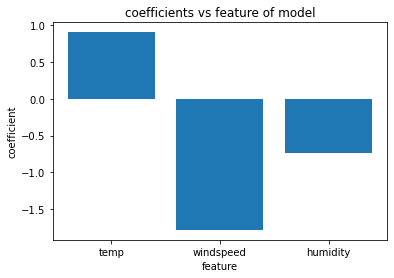

[[0.35672208 0.51677419 1.        ]
 [0.3661474  0.14580645 0.75268817]
 [0.40162325 0.06645161 0.64516129]
 ...
 [0.48186935 0.22       0.69892473]
 [0.51695248 0.44451613 0.35483871]
 [0.70048436 0.29290323 0.51612903]]
[[0.99623764 0.00376236]
 [0.99122136 0.00877864]
 [0.98872209 0.01127791]
 ...
 [0.99111459 0.00888541]
 [0.99205127 0.00794873]
 [0.98913579 0.01086421]]


In [16]:
#imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Sampling non 1000 acre wildfires (period from 2017-2019)
non1000FiresStart = datetime(2017, 1, 1)
non1000FiresStop = datetime(2019, 12, 31)

main_features['date'] = pd.to_datetime(main_features['date'], format="%Y/%m/%d")
non1000Fires = main_features[(main_features.date >= non1000FiresStart) & (main_features.date <= non1000FiresStop)]
non1000Fires['1000Acres'] = 0
non1000Fires.to_csv("non1000Fires")

print(wildfires.count())
print(non1000Fires.count())

#concatentating all 1000 acre wildfire and non 1000 acre wildfire data
final_set = pd.concat([wildfires, non1000Fires])
final_set_x = final_set[['temp', 'windspeed', 'humidity']]
final_set_y = final_set['1000Acres']

#Splitting and scaling dataset with train_test_split and min-max normalization
X_train, X_test, y_train, y_test = ms.train_test_split(final_set_x, final_set_y, train_size=0.7,test_size=0.3)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

#Fitting data to Logistic Regression algorithm
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#classification report
print("Accuracy score of model:", model.score(X_test, y_test))
print(classification_report(y_test, y_pred))

#prints number of correct vs incorrect predictions
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

# Assign feature coefficients to 
coefficients = model.coef_
coefficients = coefficients.tolist()[0]

# Plot bar graph
plt.bar([1,2, 3],coefficients)
plt.xticks([1,2, 3],['temp','windspeed', 'humidity'])
plt.xlabel('feature')
plt.ylabel('coefficient')
plt.title('coefficients vs feature of model')
plt.show()

#Print output probabilities for test set
print(X_test)
y_pred_array = model.predict_proba(X_test)
print(y_pred_array)



Accuracy score of model: 0.9932835820895523
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     31944
           1       0.00      0.00      0.00       216

    accuracy                           0.99     32160
   macro avg       0.50      0.50      0.50     32160
weighted avg       0.99      0.99      0.99     32160

[[31944     0]
 [  216     0]]


C:\Users\docto\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
